# Avocado Project

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
# Read the dataset

df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
# removing unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
# Checking the shape of the dataset
df.shape

(18249, 13)

In [7]:
# Checking the datatypes of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [9]:
#Checking the datatypes again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
# Now Seperate date and month
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [12]:
# Checking number of unique values in each column
df.nunique().sort_values()

type                2
year                4
Month              12
Day                31
region             54
AveragePrice      259
XLarge Bags      5588
4770            12071
Large Bags      15082
Small Bags      17321
4046            17702
Total Bags      18097
4225            18103
Total Volume    18237
dtype: int64

In [13]:

df.isnull().sum().sum()

0

In [14]:
#Checking for duplicate values

df.drop_duplicates(inplace=True)
df.shape

(18249, 14)

In [15]:
# List of values in the target variable
df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [16]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


# Data Visualization:

In [17]:
#Seperating numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [18]:
#Seprerating categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


# Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


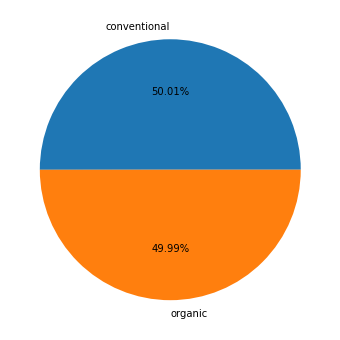

<AxesSubplot:xlabel='type', ylabel='Count'>

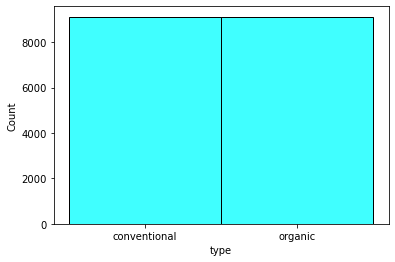

In [19]:
#Visualize the count of 'type'feature of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%')

plt.show()
sns.histplot(data = df, x = 'type', stat = 'count', color = 'Cyan', legend = True)

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


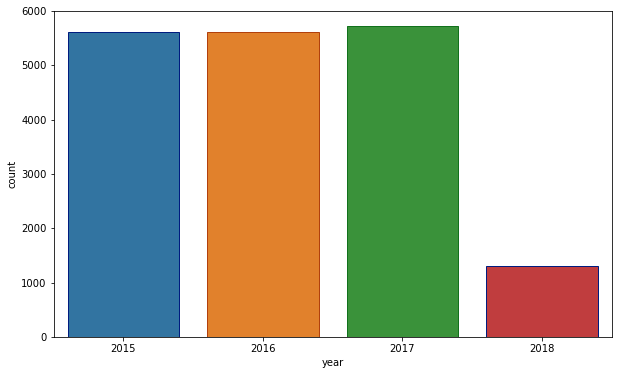

In [20]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

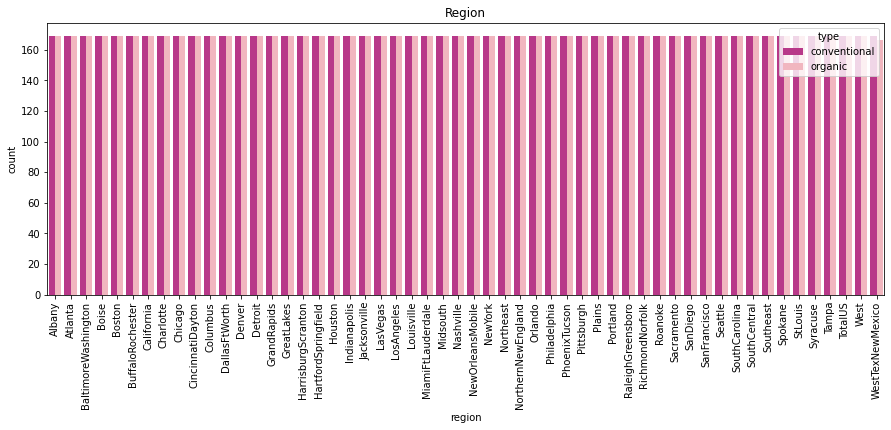

In [22]:
#Visualize the count of Region
plt.figure(figsize=(15,5))
sns.countplot(df["region"],palette="RdPu_r",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

# The relation between each other by ploting pair pot:

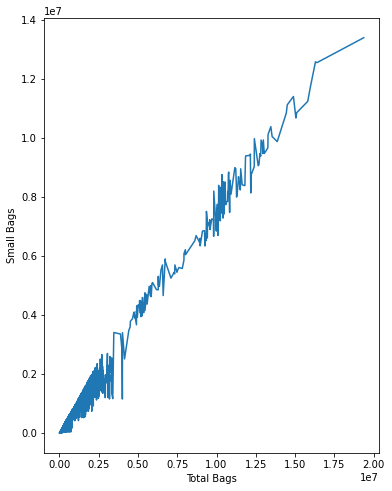

In [25]:
#let us plot pairwise where we feel of high relation:

plt.figure(figsize=(6,8))
sns.lineplot('Total Bags','Small Bags',data=df)
plt.show()

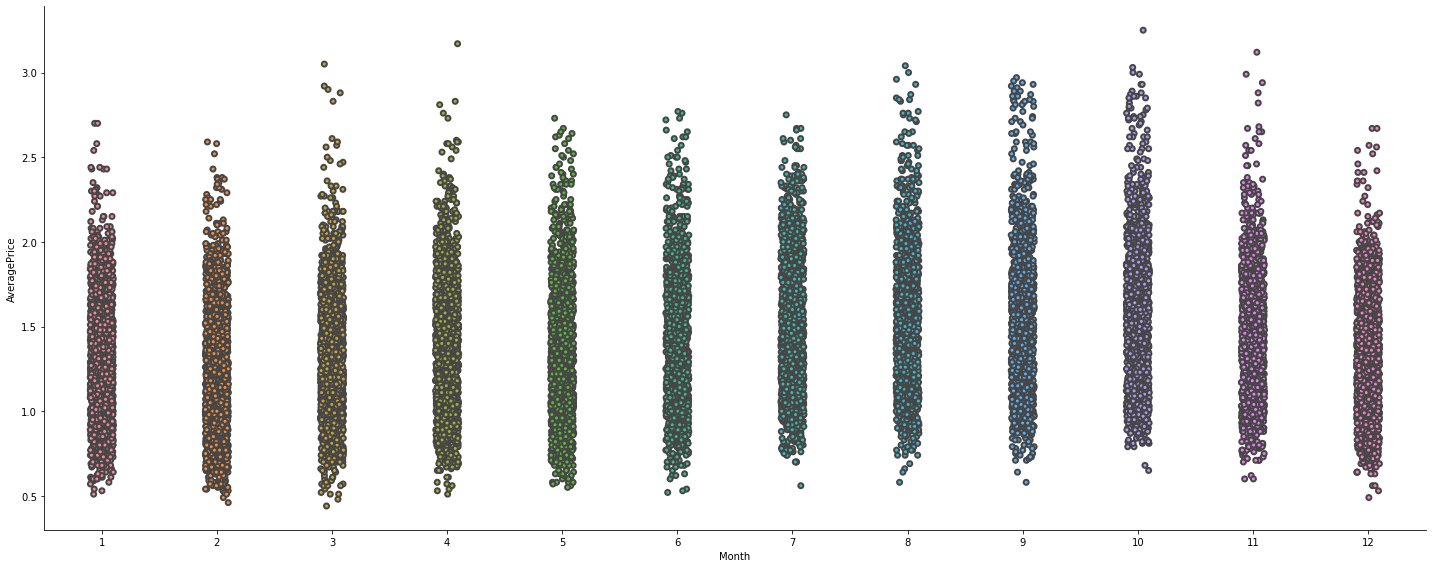

In [27]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

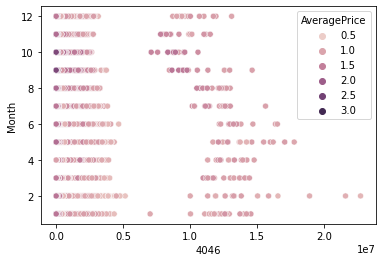

In [28]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=df)
plt.show()

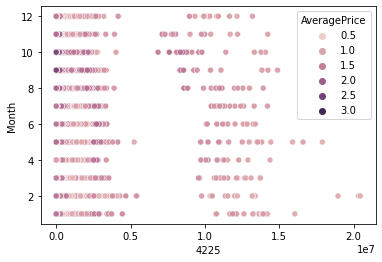

In [29]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=df)
plt.show()

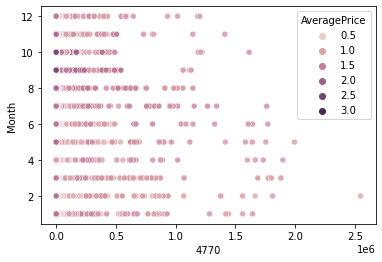

In [30]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=df)
plt.show()

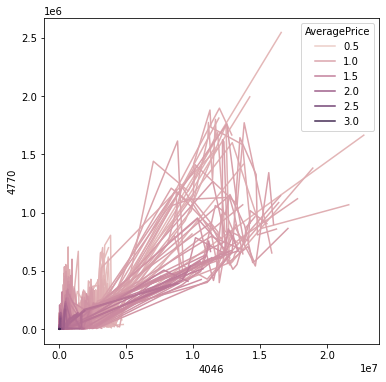

In [31]:
#let us plot count plot of 4046,4225,4770 
plt.figure(figsize=(6,6))
sns.lineplot('4046','4770',data=df,hue='AveragePrice')
plt.show()

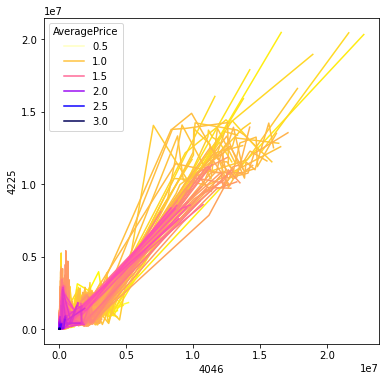

In [32]:
plt.figure(figsize=(6,6))
sns.lineplot('4046','4225',data=df,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

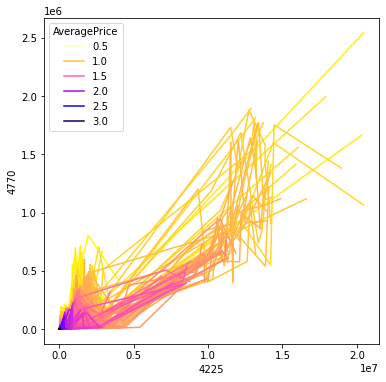

In [33]:
plt.figure(figsize=(6,6))
sns.lineplot('4225','4770',data=df,palette='gnuplot2_r',hue='AveragePrice')
plt.show()

# Relationship between year and Total volume:

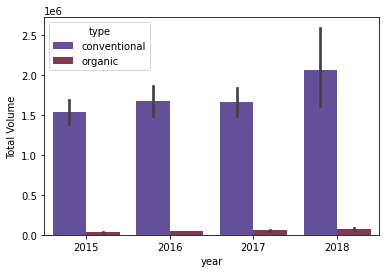

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="twilight")
plt.show()

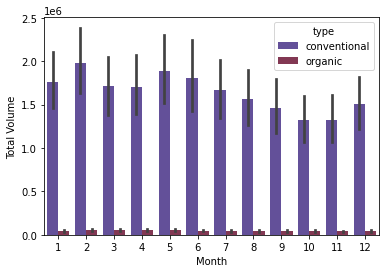

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=df,palette="twilight")
plt.show()

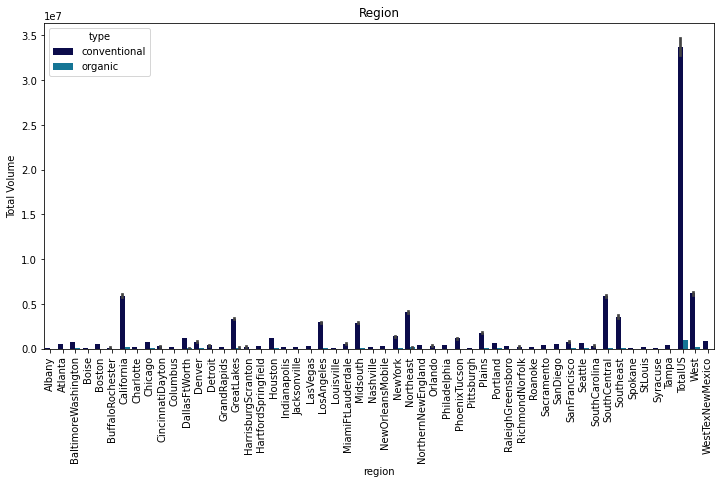

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(df["region"],df['Total Volume'],palette="ocean",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

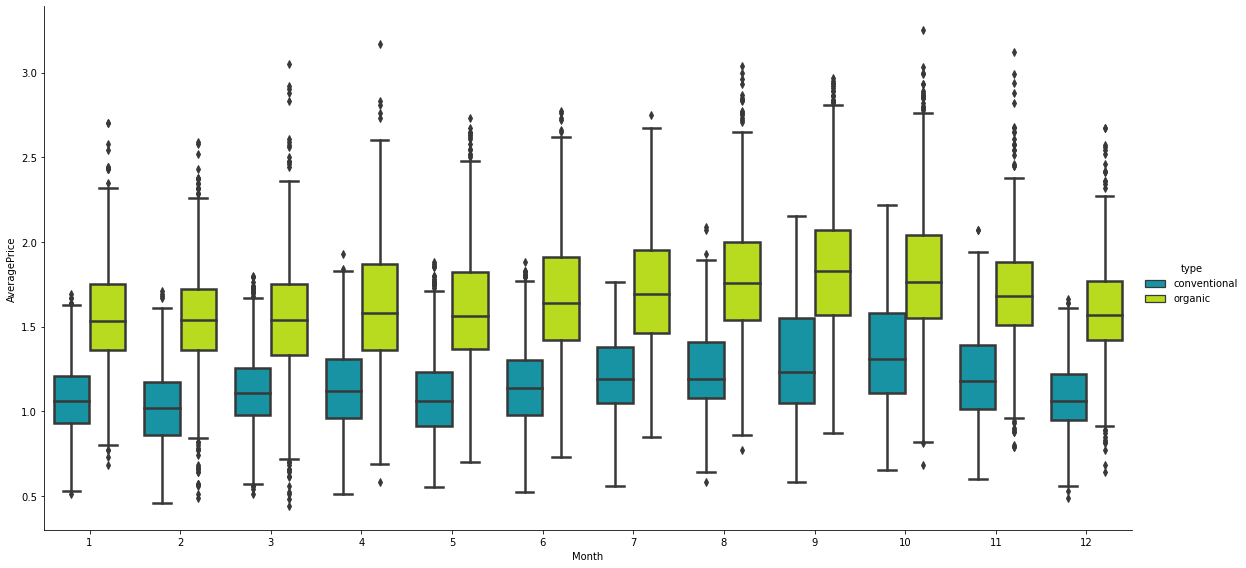

In [37]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="nipy_spectral");

# Relationship between Total volume and Average Price:

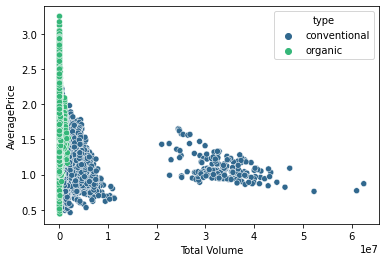

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="viridis")
plt.show()

# Comparison between PLU sold vs day:

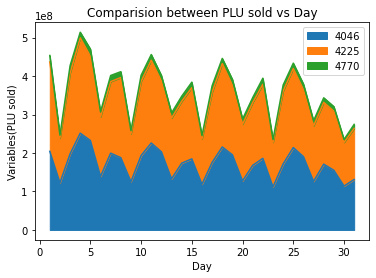

In [40]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

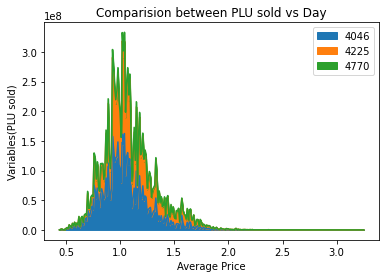

In [41]:
# Type of PLU sold and Average Price
variables = df[['4046', '4225', '4770']].groupby(df.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

# Comparison between the Total Bags and Total Volume:

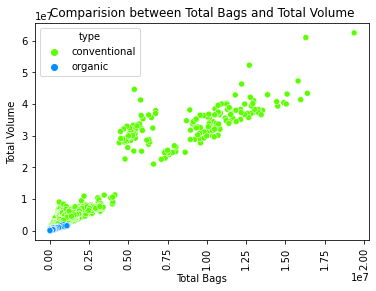

In [42]:
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=df,palette="gist_rainbow")
plt.xticks(rotation=90)
plt.show()

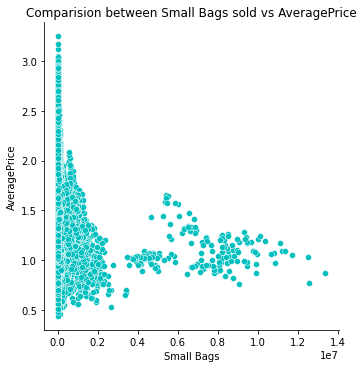

In [44]:
# Comparision between Small Bags sold vs AveragePrice:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="c");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

# Checking for outliers:

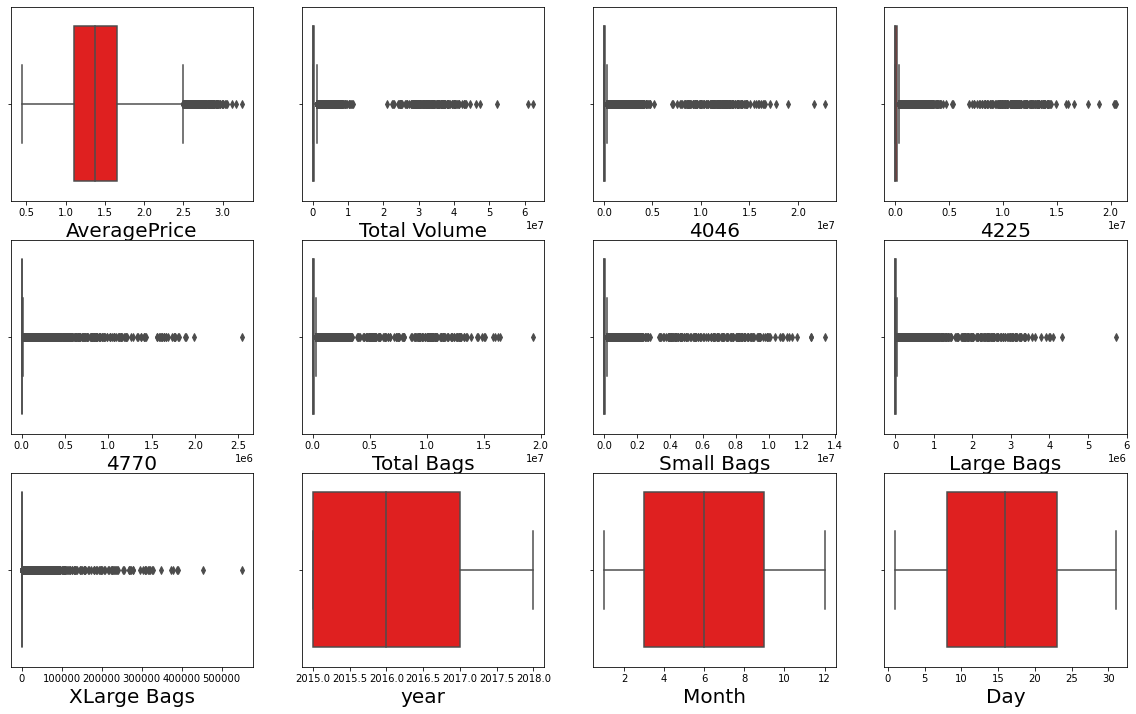

In [45]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Zscore method

In [46]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [47]:
# Creating new dataframe by removing zscore
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [49]:
df.shape

(18249, 14)

In [50]:
new_df.shape

(17782, 14)

In [51]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

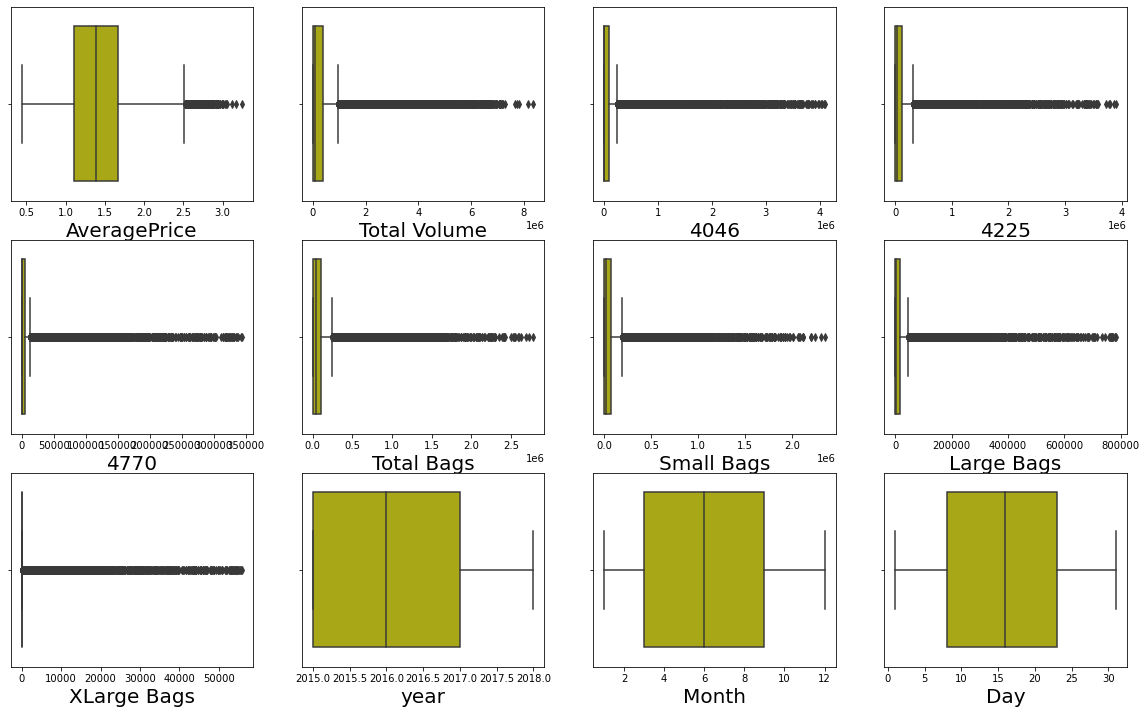

In [52]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking and removing Skewness:

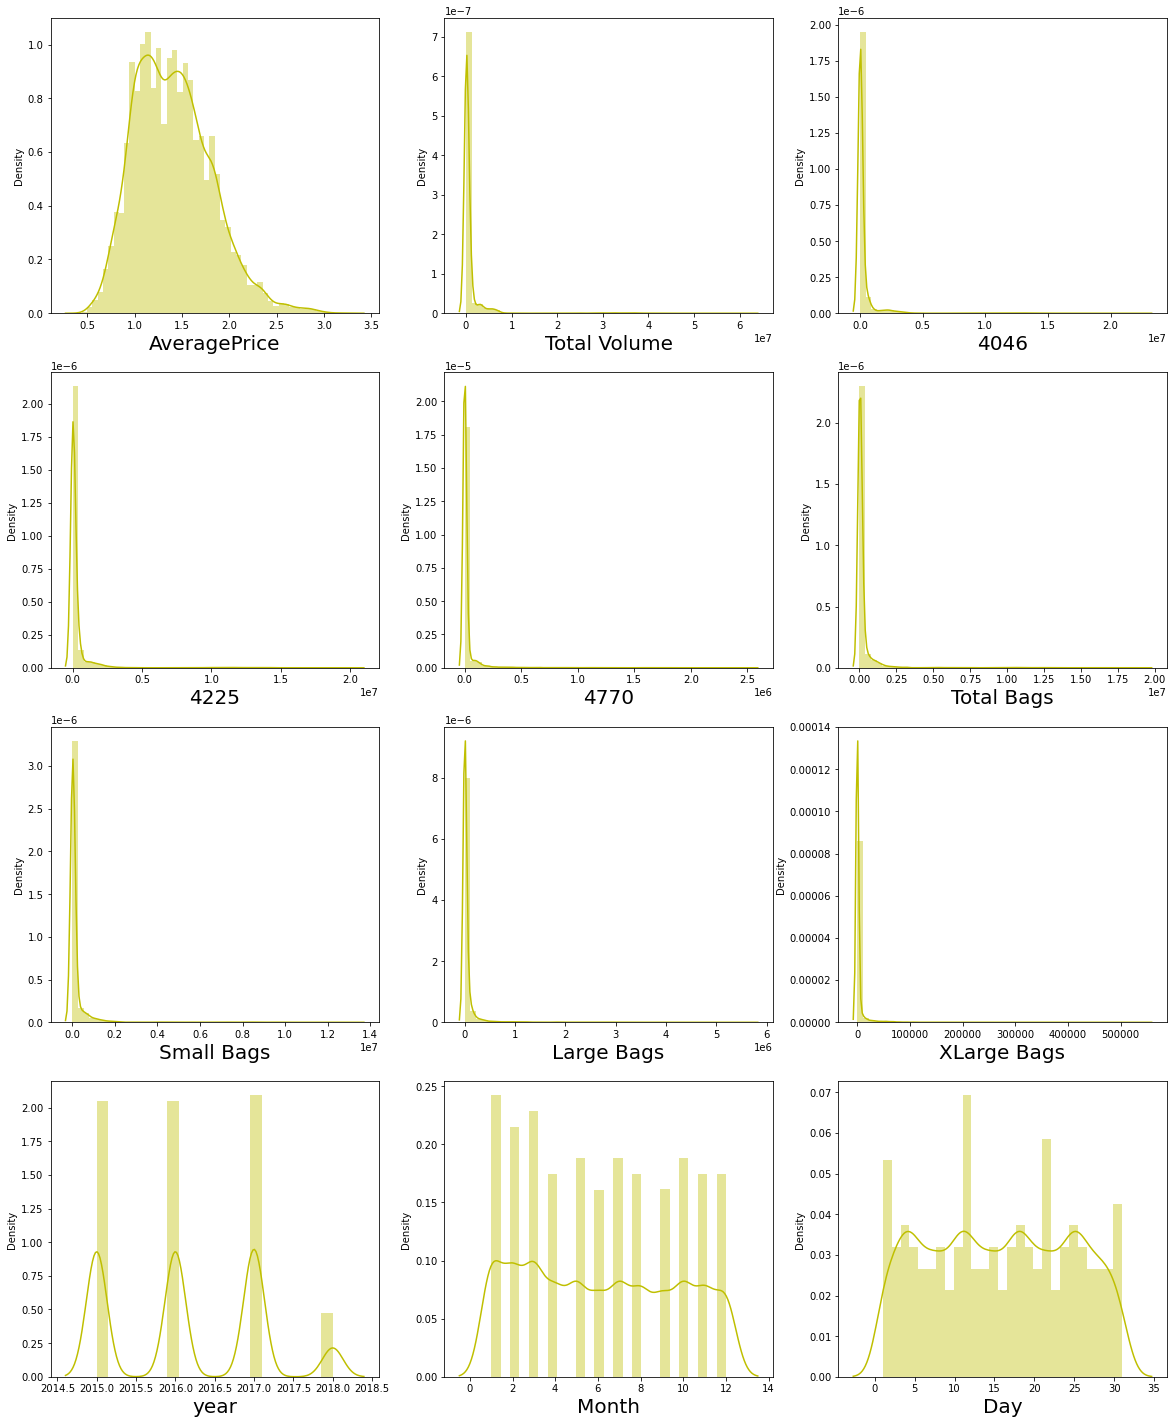

In [53]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [55]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [56]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost evry skewness is removed but still Xlarge Bags have some skewness let us check with graph and try .remove it

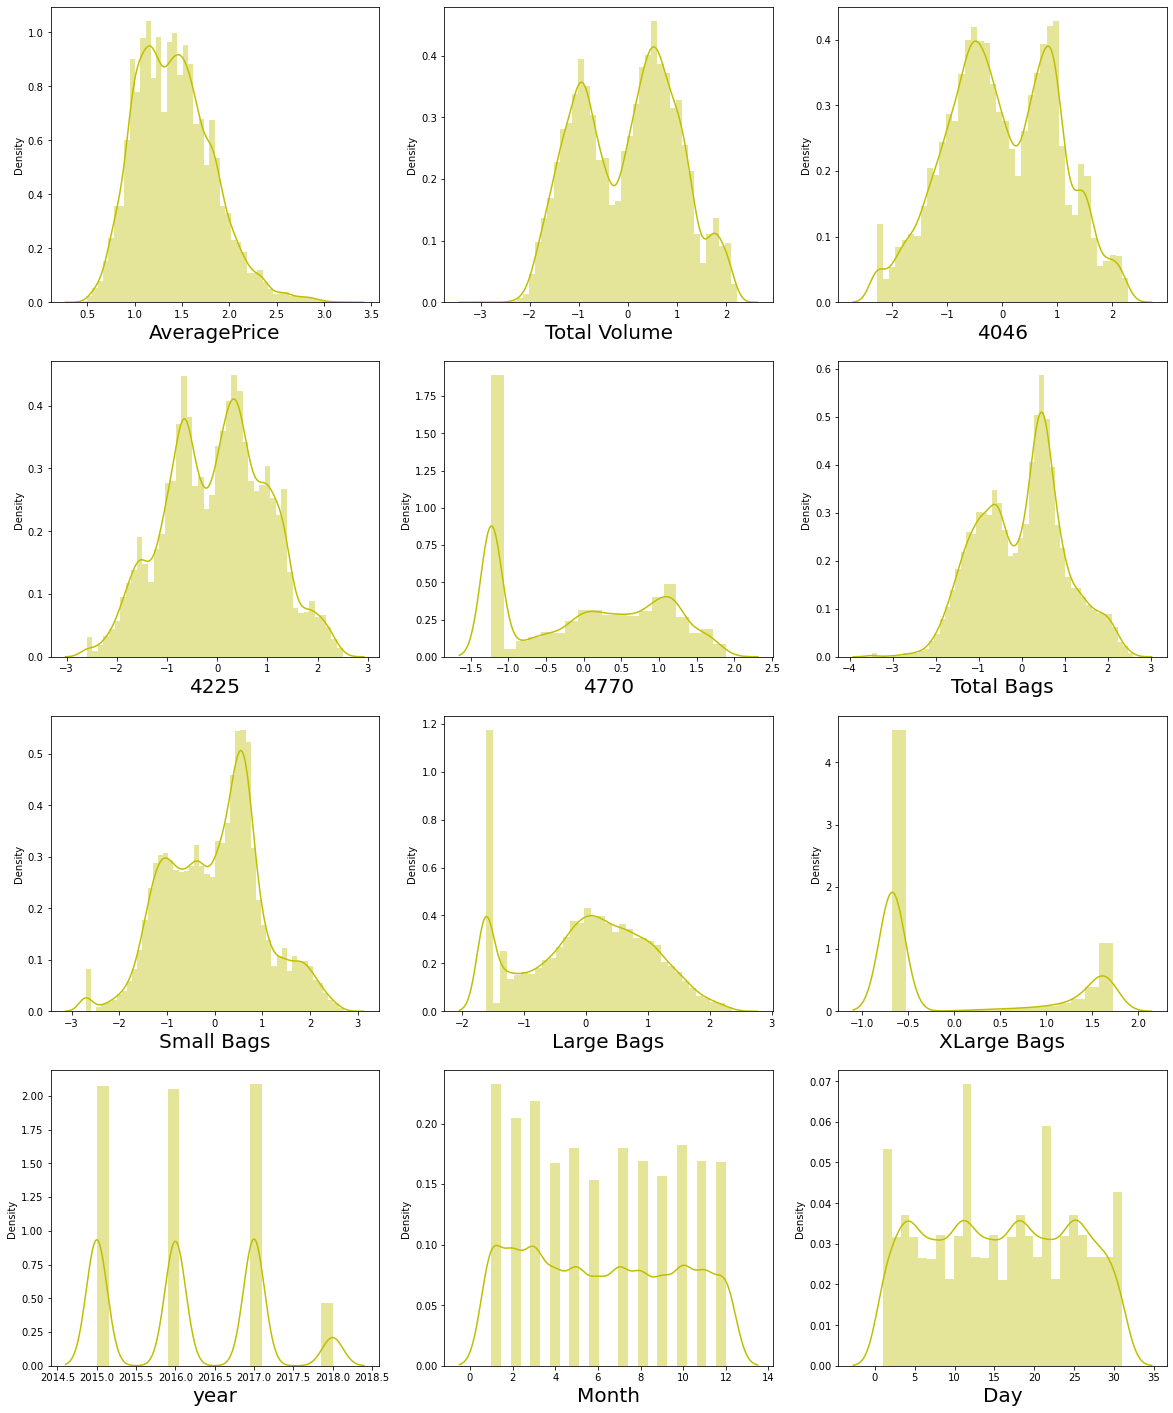

In [57]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

so above graph shows that there is skewness in Xlarge column . we will try to remove it using log1 method.

In [58]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [59]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding:

In [60]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation using HEAT map:

In [61]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.393528,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.627310,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573589,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.580290,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.615107,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.609370,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.597809,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.449473,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.393528,0.627310,0.573589,0.580290,0.615107,0.609370,0.597809,0.449473,1.000000,-0.673864,0.153607,-0.015786,0.022063,0.011528
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.673864,1.000000,0.007399,0.021970,-0.005044,-0.002469


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

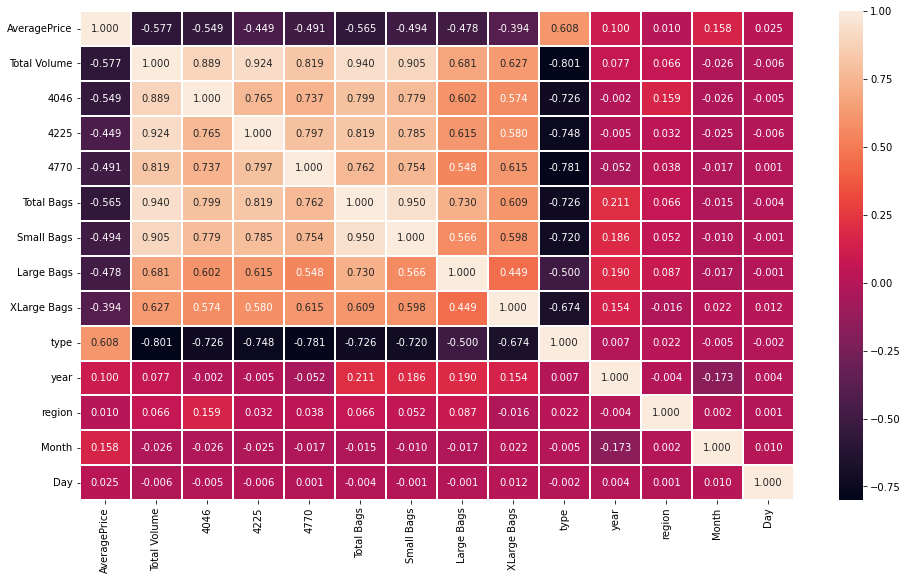

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [63]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

Visualizing the correlation between label and features using bar plot

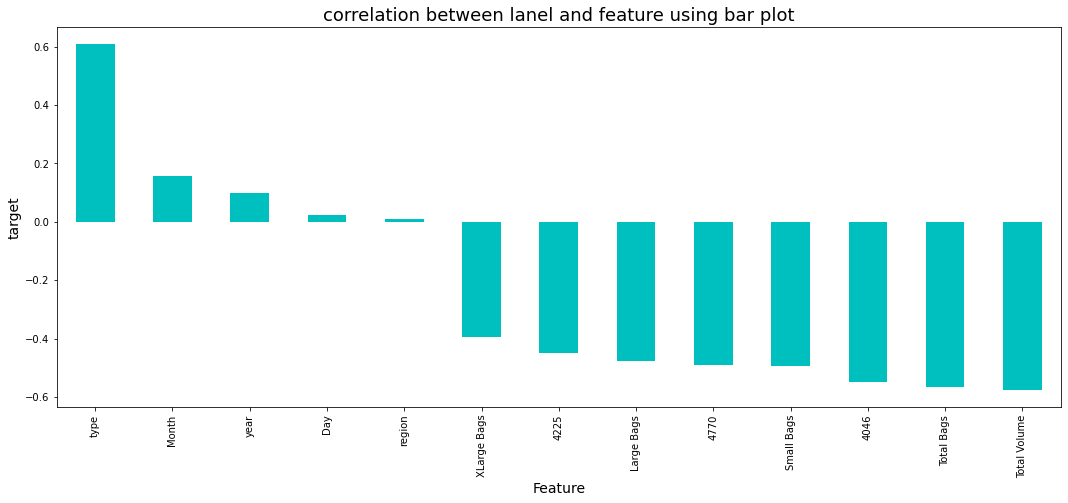

In [64]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [65]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [66]:
# Saving the data for classification
class_df=new_df
class_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [67]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [68]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1,2018,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1,2018,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1,2018,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1,2018,1,14


# Separating the features and label variables into x and y:

In [69]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

# Standard Scalarization Method

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.358706,1.517088
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,0.974238,1.979143,-1.185845,-1.331072
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,0.974238,1.979143,-1.468572,1.403161
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,0.974238,1.979143,-1.468572,0.605677
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,0.974238,1.979143,-1.468572,-0.191808


# Checking VIF values for multicollinearity:

In [71]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.519431,Total Volume
1,6.752126,4046
2,11.107325,4225
3,3.890095,4770
4,34.408868,Total Bags
5,16.622534,Small Bags
6,3.460516,Large Bags
7,3.320393,type
8,1.332874,year
9,1.048738,Month


In [72]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [73]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,36.655341,Total Volume
1,6.032782,4046
2,9.932006,4225
3,3.886417,4770
4,7.643315,Small Bags
5,2.102990,Large Bags
6,3.283398,type
7,1.305229,year
8,1.046372,Month
9,1.000594,Day


now VIF is less than 10 , so we move further:

# Building a model:

In [74]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.800240003311685  on Random_state  373


In [75]:
#Creating new train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [77]:
#Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# RANDOM FOREST REGRESSOR

In [78]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())


print ("The difference between R2 score and CV is", (r2_score(y_test,pred_RFR)-(cross_val_score(RFR,x,y,cv=5).mean())))

R2_Score: 0.8690196490307343
MAE: 0.10164957825679471
MSE: 0.021093809508903463
RMSE: 0.14523708035107102
Cross_Validaton_Score 0.2061832051606661
The difference between R2 score and CV is 0.665407182733361


# Support Vector Machine Regressor

In [79]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7763971340912021
MAE: 0.1400072583634998
MSE: 0.0360102582121788
RMSE: 0.18976369044730027
Cross_Validaton_Score 0.18605815975802745


# Linear Regression

In [80]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5585289403440374
MAE: 0.20620075452191092
MSE: 0.07109697269219975
RMSE: 0.26664015581341033
Cross_Validaton_Score 0.20217204304746317


# Gradient Descent Regressor:

In [81]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5550373747440334
MAE: 0.20706919952787625
MSE: 0.0716592739771582
RMSE: 0.2676924989183638
Cross_Validaton_Score 0.18718778541331932


# KNN Regressor

In [82]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.800240003311685
MAE: 0.1318526710402999
MSE: 0.032170468978444236
RMSE: 0.1793612805999228
Cross_Validaton_Score 0.12260919939063734


# GradientBoosting Regressor:

In [83]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7234575297741728
MAE: 0.15930964155186064
MSE: 0.04453594867396549
RMSE: 0.2110354204250213
Cross_Validaton_Score 0.34749156977319096


From the difference between R2 score and Cross Validation Score, we can conclusion that KNeighbors Regressor will be our best fitting model.

# Hyperparameter Tuning:

In [84]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [86]:
GCV.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 6,
 'weights': 'distance'}

In [87]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14523708035107102
R2_Score: 80.28699333723932


# Saving the model

In [88]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado_model,"Avocado_project.pkl")

['Avocado_project.pkl']

# Predicting the saved model:

In [89]:
# Let's load the saved model and get the prediction

model=joblib.load("Avocado_project.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.47661108, 1.14693846, 1.95491445, ..., 1.04238993, 1.25892986,
       1.76930987])

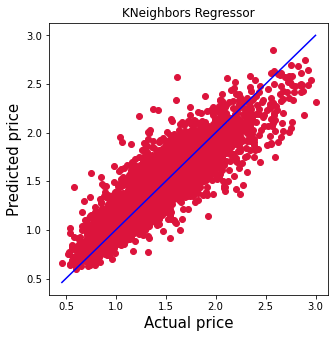

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [91]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.35,1.476611
1,1.21,1.146938
2,2.24,1.954914
3,0.95,1.022009
4,1.03,1.106619
...,...,...
5330,0.95,1.170572
5331,1.04,1.087238
5332,0.97,1.042390
5333,1.08,1.258930


# Classification Problem- Finding the Region from these data

In [92]:
data= pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [93]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [94]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [95]:
data.shape

(18249, 14)

In [96]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [97]:
class_df = data

# Encoding the categorical columns using Label Encoding

In [98]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# correlation

In [99]:
class_df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


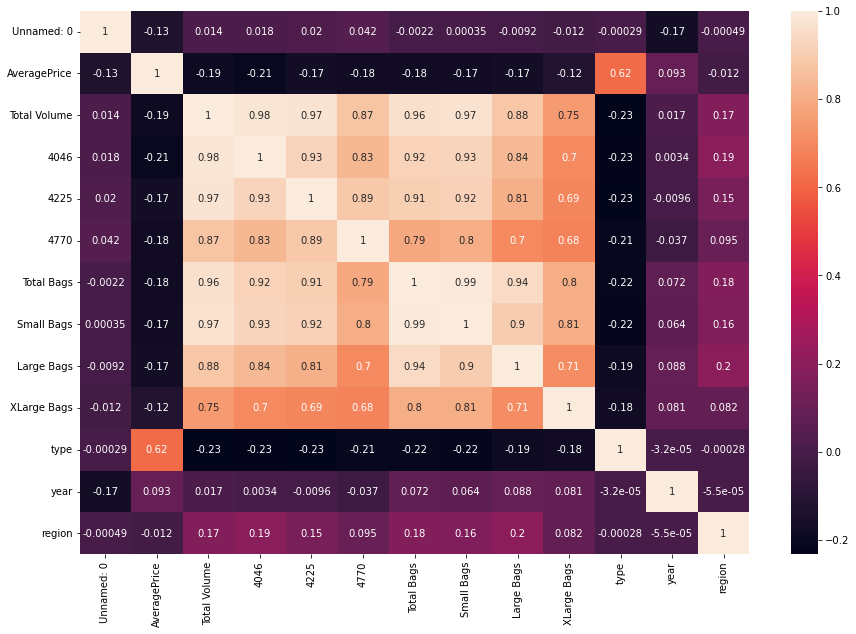

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [101]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

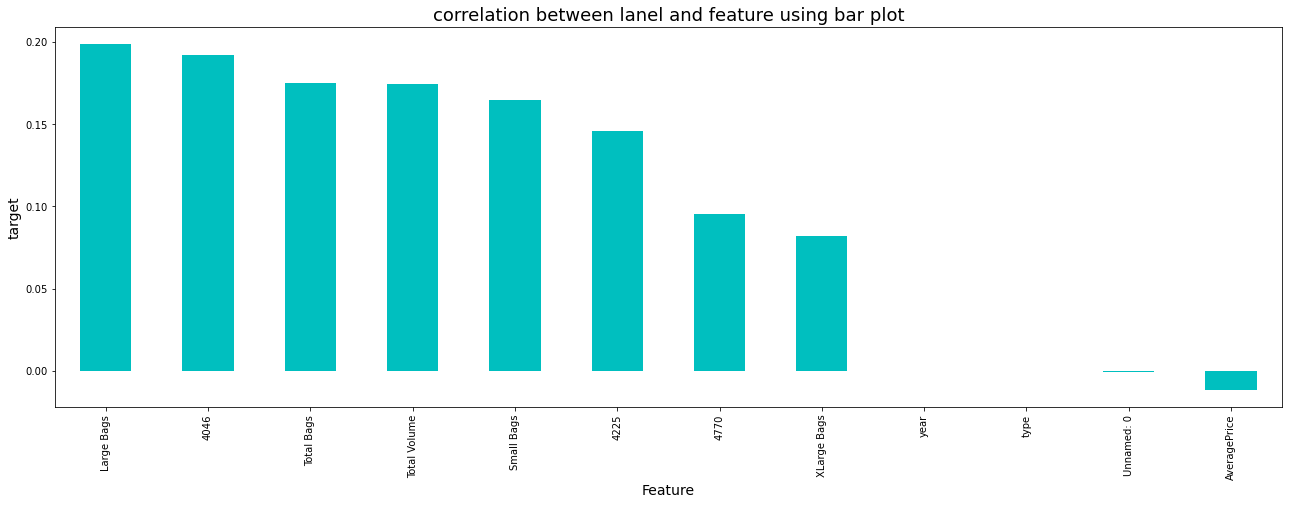

In [102]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [103]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [104]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [106]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.036026e+00,Unnamed: 0
1,1.708597e+00,AveragePrice
2,4.919440e+09,Total Volume
3,6.600171e+08,4046
4,5.980301e+08,4225
5,4.763436e+06,4770
6,2.370316e+14,Total Bags
7,1.364727e+14,Small Bags
8,1.448103e+13,Large Bags
9,7.621400e+10,XLarge Bags


In [107]:
x.drop('Total Volume',inplace=True,axis=1)

In [108]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034805e+00,Unnamed: 0
1,1.708413e+00,AveragePrice
2,1.006420e+01,4046
3,1.347443e+01,4225
4,5.378730e+00,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621336e+10,XLarge Bags
9,1.686748e+00,type


In [109]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034688,Unnamed: 0
1,1.708412,AveragePrice
2,10.061400,4046
3,13.472625,4225
4,5.378704,4770
5,19.342873,Small Bags
6,5.544875,Large Bags
7,3.414144,XLarge Bags
8,1.686706,type


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7983561643835616  on Random_state  184


In [111]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=51)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [113]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7970776255707762
[[ 86   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   0]
 [  0   0  93 ...   0   0   1]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1  97   0]
 [  0   1   1 ...   0   0  66]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.70      0.77      0.74       105
           2       0.89      0.86      0.87       108
           3       0.80      0.74      0.77       109
           4       0.78      0.86      0.82        95
           5       0.74      0.72      0.73       104
           6       0.95      0.95      0.95        99
           7       0.88      0.84      0.86       110
           8       0.91      0.95      0.93        93
           9       0.78      0.85      0.81       107
          10       0.70      0.70      0.70        98
          11       0.88      0.85      0.87       114
          12       0.83      0.78      0.80       116
          13       0.82      0.6

# Random Forest Classifier

In [114]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9077625570776255
[[101   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   1   2 ...   0   0  78]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       105
           1       0.84      0.85      0.84       105
           2       0.96      0.98      0.97       108
           3       0.91      0.77      0.84       109
           4       0.89      0.94      0.91        95
           5       0.89      0.85      0.87       104
           6       0.98      1.00      0.99        99
           7       0.93      0.91      0.92       110
           8       0.98      1.00      0.99        93
           9       0.93      0.93      0.93       107
          10       0.80      0.90      0.85        98
          11       0.99      0.96      0.97       114
          12       0.94      0.89      0.92       116
          13       0.88      0.8

# Logistic Regression

In [115]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.30575342465753425
[[26  0  0 ...  0  0  0]
 [ 9 21  0 ...  0  0  0]
 [ 1  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 95 13  0]
 [ 0  0  0 ...  2 70  0]
 [ 5  0  0 ...  0  0 21]]
              precision    recall  f1-score   support

           0       0.09      0.25      0.14       105
           1       0.60      0.20      0.30       105
           2       0.69      0.38      0.49       108
           3       0.24      0.25      0.25       109
           4       0.39      0.25      0.31        95
           5       0.60      0.03      0.06       104
           6       0.70      0.63      0.66        99
           7       0.35      0.29      0.32       110
           8       0.17      0.54      0.26        93
           9       0.38      0.46      0.41       107
          10       0.39      0.17      0.24        98
          11       0.34      0.43      0.38       114
          12       0.52      0.40      0.45       116
          13       0.21      0.36      0.26       106
          14 

# Support Vector Machine

In [116]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.24493150684931506
[[ 1  0  0 ...  0  0  0]
 [ 3  9  0 ...  0  0  4]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 92  2  0]
 [ 0  0  0 ...  0 61  0]
 [ 2  5  0 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       105
           1       0.31      0.09      0.13       105
           2       0.92      0.20      0.33       108
           3       0.00      0.00      0.00       109
           4       0.14      0.08      0.10        95
           5       0.07      0.15      0.10       104
           6       0.96      0.47      0.64        99
           7       0.36      0.07      0.12       110
           8       0.96      0.52      0.67        93
           9       0.76      0.15      0.25       107
          10       0.60      0.03      0.06        98
          11       0.41      0.44      0.42       114
          12       0.80      0.38      0.51       116
          13       0.87      0.31      0.46       106
          14 

# k nearest Neighbours

In [117]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.31141552511415527
[[ 33   3   8 ...   0   0   0]
 [  7  48   2 ...   0   0   0]
 [  1   2  49 ...   0   0   0]
 ...
 [  0   0   0 ... 107   0   0]
 [  0   2   0 ...   3  68   0]
 [  7   3   2 ...   0   0  39]]
              precision    recall  f1-score   support

           0       0.10      0.31      0.15       105
           1       0.18      0.46      0.26       105
           2       0.22      0.45      0.30       108
           3       0.13      0.26      0.17       109
           4       0.15      0.37      0.22        95
           5       0.11      0.22      0.15       104
           6       0.63      0.60      0.61        99
           7       0.13      0.20      0.16       110
           8       0.39      0.59      0.47        93
           9       0.20      0.31      0.24       107
          10       0.07      0.13      0.09        98
          11       0.29      0.42      0.34       114
          12       0.48      0.52      0.50       116
          13       0.36      0.

# cross validation score:

In [118]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.5442954459281395
0.6785470367186356
0.25781370013176813
0.20756560814184408
0.1884423805358571


# HYPERPARAMETER TUNING

In [119]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [120]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [121]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.59360730593608


# SAVE THE MODEL

In [122]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# PREDICTION ON SAVED MODEL

In [123]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([46,  7, 14, ..., 26,  3,  2])

# ROC- AUC curve:

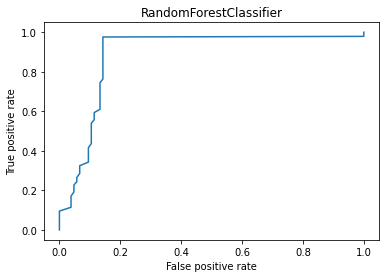

In [124]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

# As from this data set we have following conclusion:

taking price as y variable is predicting well for this model as comapared to region
also r2 score value is also greater then accuracy score

In [125]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,46,46
1,7,7
2,14,14
3,1,1
4,22,15
...,...,...
5470,2,8
5471,1,48
5472,26,26
5473,3,3


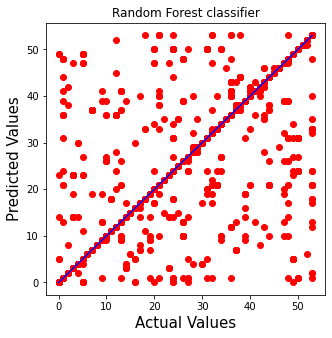

In [126]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()